In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## As the worst image quality is in Fishing vessels folder, we will use that folder to train the model




In [5]:
# as the worst image quality is in Fishing vessels folder, we will use that folder to train the model
path = 'Fishing vessel'
import os

images = os.listdir(path)
# for i in images:
#     print(i)


# To view some images

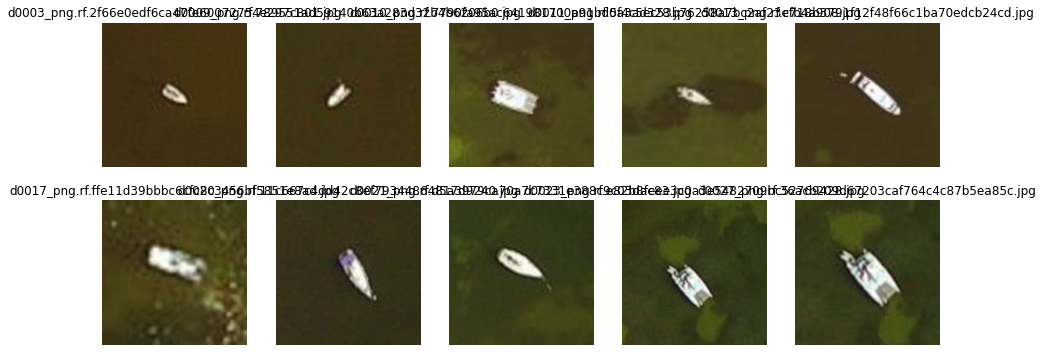

In [12]:
# view some images
# plt.imshow(cv2.imread('Fishing vessel\\d0003_png.rf.2f66e0edf6ca47fe60072754e297c801.jpg'), cmap='gray')

import cv2
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(15, 6))
axs = axs.flatten()

for i in range(10):
  img = cv2.imread('Fishing vessel\\'+images[i])
  axs[i].imshow(img, cmap='gray')
  axs[i].set_title(images[i])
  axs[i].axis('off')

plt.show()



# Applied Laplacian filter to the image
- ## Laplacian filter is a second derivative edge detection filter
- ## It is used to find edges in an image
- ## It is very sensitive to noise
- ## It is used to sharpen an image
- ## It is used to detect edges in an image
- ## It is used to enhance edges in an image

# 0 1 0
# 1 -4 1
# 0 1 0

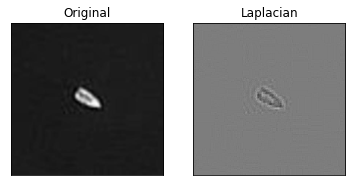

In [25]:
# apply laplacian mask to image, to get boundary details
# https://www.youtube.com/watch?v=ZmYPzESC5YY

# 0 1 0
# 1 -4 1
# 0 1 0

import cv2
import numpy as np
from matplotlib import pyplot as plt
 
img = cv2.imread('FIshing vessel//d0003_png.rf.2f66e0edf6ca47fe60072754e297c801.jpg',0)
laplacian = cv2.Laplacian(img,cv2.CV_64F)

 
plt.subplot(1,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
 
plt.show()

# Apply laplacian with diagonal neighbors

# 1  1  1
# 1 -8  1
# 1  1  1

  


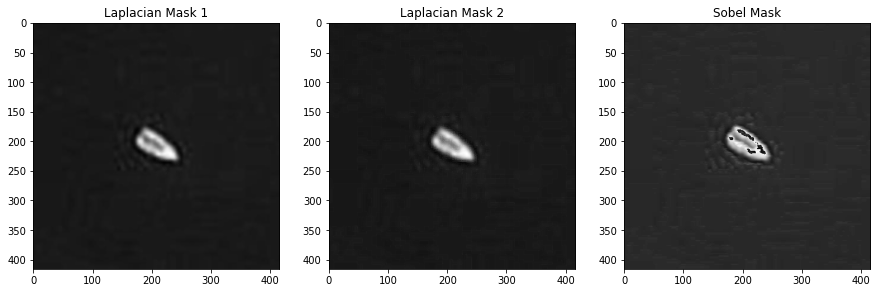

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def applyLaplacian(laplacianMask, img):
  # Apply laplacian filter to the image
  filteredImg = cv2.filter2D(img, -1, laplacianMask)
  
  # Add the filtered image to the original image to enhance the boundary information
  finalImg = np.uint8(np.clip(img + filteredImg, 0, 255))
  
  return finalImg
  
def applySobel(sobelMask, img):
  # Apply sobel filter to the image
  filteredImg = cv2.filter2D(img, -1, sobelMask)
  
  # Add the filtered image to the original image to enhance the boundary information
  finalImg = np.uint8(np.clip(img + filteredImg, 0, 255))
  
  return finalImg

# Load the image
img = cv2.imread('FIshing vessel//d0003_png.rf.2f66e0edf6ca47fe60072754e297c801.jpg',0)

laplacianMask = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])  
final_img = applyLaplacian(laplacianMask, img)

laplacianMask2 = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]])
final_img2 = applyLaplacian(laplacianMask2, img)

sobelMask = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
final_img3 = applySobel(sobelMask, img)

# Display the images side by side
fig, axs = plt.subplots(1, 3, figsize=(15, 6))
axs[0].imshow(final_img, cmap='gray')
axs[0].set_title('Laplacian Mask 1')
axs[1].imshow(final_img2, cmap='gray')
axs[1].set_title('Laplacian Mask 2')
axs[2].imshow(final_img3, cmap='gray')
axs[2].set_title('Sobel Mask')
plt.show()


# Now try histogram equalization
# https://docs.opencv.org/3.1.0/d5/daf/tutorial_py_histogram_equalization.html



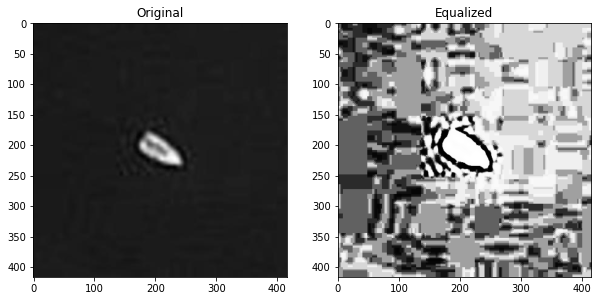

In [31]:
def hist_equalization(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    return img
# Load the image
img = cv2.imread('FIshing vessel//d0003_png.rf.2f66e0edf6ca47fe60072754e297c801.jpg',0)

# Apply the histogram equalization method
equ = cv2.equalizeHist(img)
 
plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(img, cmap='gray'),plt.title('Original')
plt.subplot(122),plt.imshow(equ, cmap='gray'),plt.title('Equalized')
plt.show()
